In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as  np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
# Importing dataframes (3 csv files)

studentmat = pd.read_csv("Data/student-mat.csv")
studentpor = pd.read_csv("Data/student-por.csv")
studentmerge = pd.read_csv("Data/student-merge.csv")

# Storing set information for easier access
sets = [[studentmat, 'math', 'green'], [studentpor, 'Portuguese', 'blue'], [studentmerge, 'all', 'red']]    


In [4]:
# Checking for missing values in our dataframes

for s in sets:
    print("Null values per column(student-{}):".format(s[1]))
    print(s[0].isnull().sum())
    print()


Null values per column(student-math):
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Null values per column(student-Portuguese):
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel  

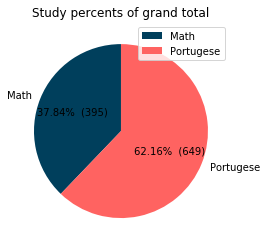

The number of math students in the merged dataset is: 395
The number of portugese students in the merged dataset is: 649


In [5]:
def make_autopct(values):
    """Adds value and percentage labels to the pie chart"""
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


# Study field representation in studentmerge
mathcount = studentmat['sex'].count()
porcount = studentpor['sex'].count()

countlist = [mathcount,porcount,'Math','Portugese']

plt.pie(countlist[0:2],labels=countlist[2:4],autopct=make_autopct(countlist[0:2]), startangle=90,colors=["#003f5c","#ff6361"])
plt.title('Study percents of grand total')
plt.legend(countlist[2:4])
plt.show()

print('The number of math students in the merged dataset is: ' + str(mathcount) )
print('The number of portugese students in the merged dataset is: ' + str(porcount) )

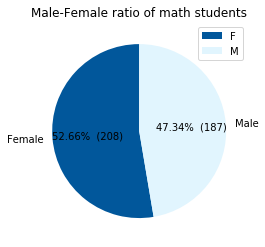

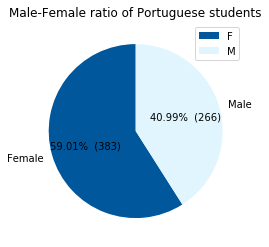

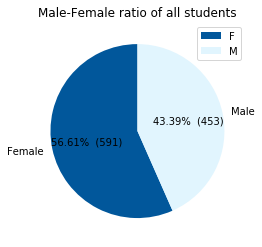

In [6]:
# Checking the Male-Female ratio of all studies

def pieplot(dataset, name):
    """Generates a Male-Female ratio pie plots"""
    
    plt.pie(dataset['sex'].value_counts().tolist(), 
            labels=['Female', 'Male'], colors=['#01579b', '#E1F5FE'], 
            autopct=make_autopct(dataset['sex'].value_counts().tolist()), startangle=90)
    plt.title('Male-Female ratio of {} students'.format(name))
    plt.legend(dataset['sex'].unique())
    plt.show()
    
for s in sets:
    pieplot(s[0], s[1])
    


math student alcohol consumption (distribution)


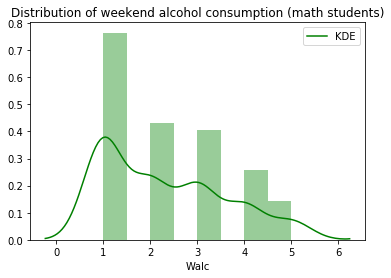

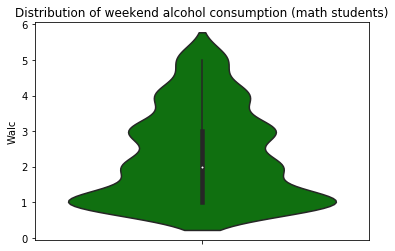

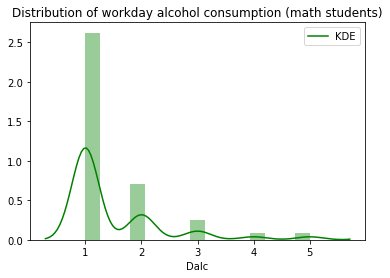

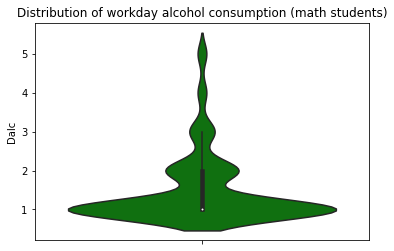

Portuguese student alcohol consumption (distribution)


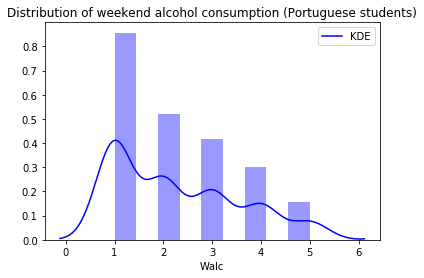

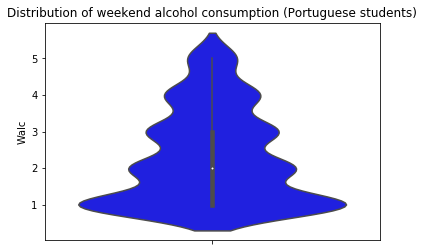

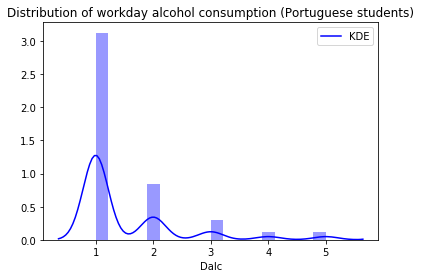

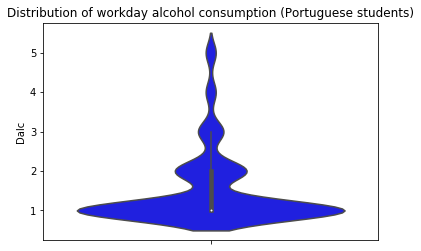

all student alcohol consumption (distribution)


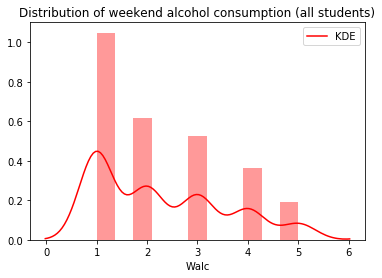

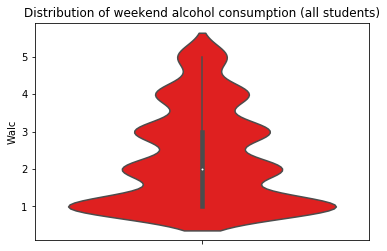

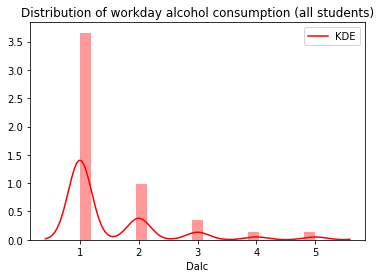

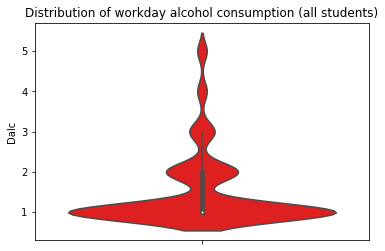

In [7]:
def distribution_plot(dataset, name, color):
    """Generates distribution plots"""
    print("{} student alcohol consumption (distribution)".format(name))

    sns.distplot(dataset["Walc"],color=color,kde_kws={"label": "KDE"})
    plt.title("Distribution of weekend alcohol consumption ({} students)".format(name))
    plt.legend()
    plt.show()

    sns.violinplot(y=dataset["Walc"],color=color)
    plt.title("Distribution of weekend alcohol consumption ({} students)".format(name))
    plt.show()

    sns.distplot(dataset["Dalc"],color=color,kde_kws={"label": "KDE"})
    plt.title("Distribution of workday alcohol consumption ({} students)".format(name))
    plt.legend()
    plt.show()

    sns.violinplot(y=dataset["Dalc"],color=color)
    plt.title("Distribution of workday alcohol consumption ({} students)".format(name))
    plt.show()
    
for s in sets:
    distribution_plot(s[0], s[1], s[2])   


Distributions of all integer columns of math students


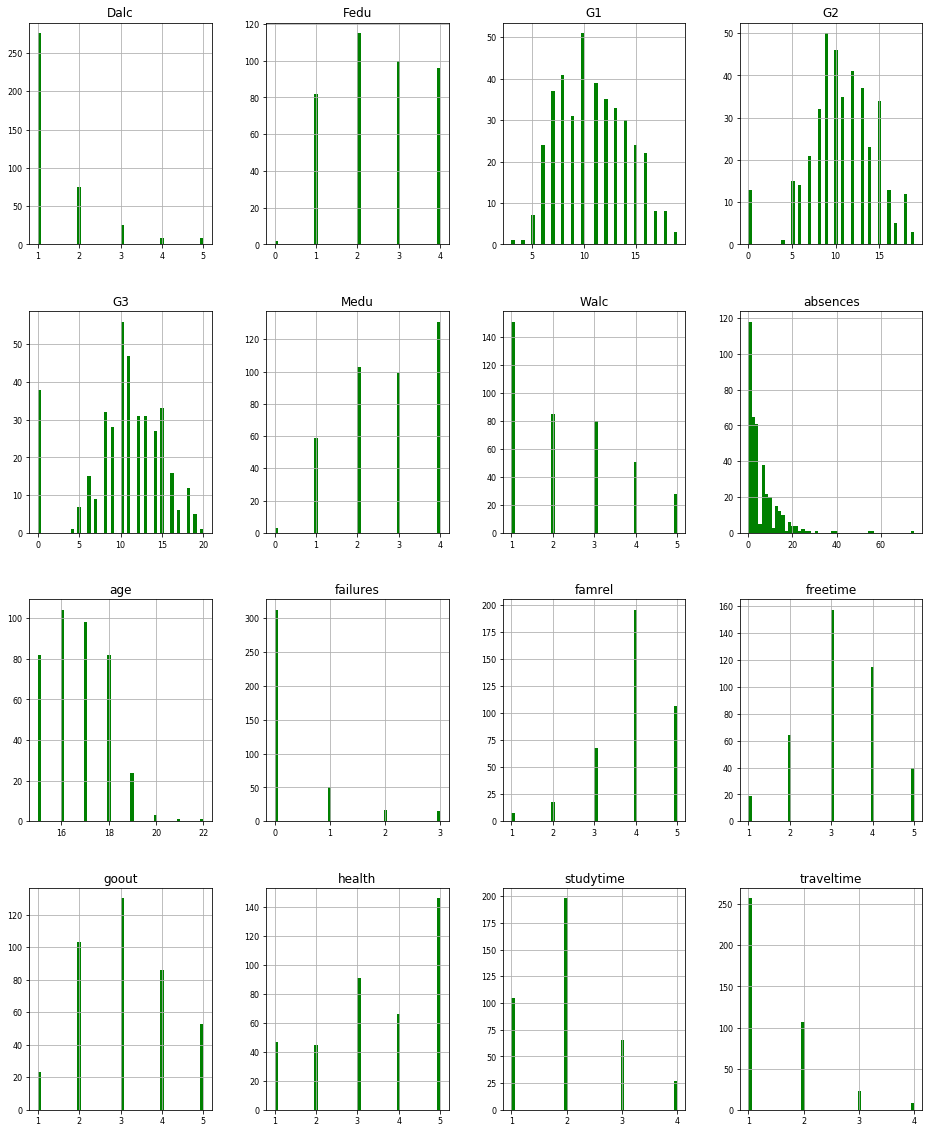

Distributions of all integer columns of Portuguese students


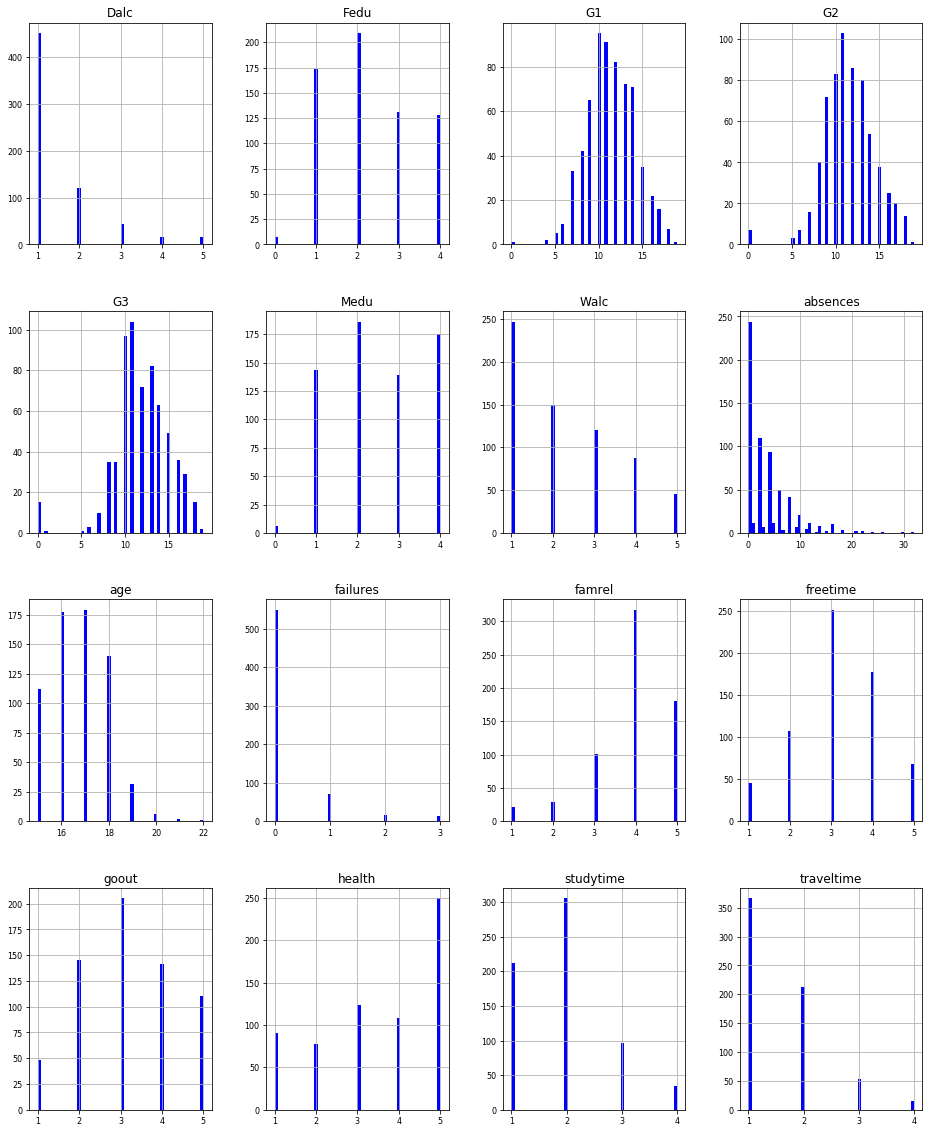

Distributions of all integer columns of all students


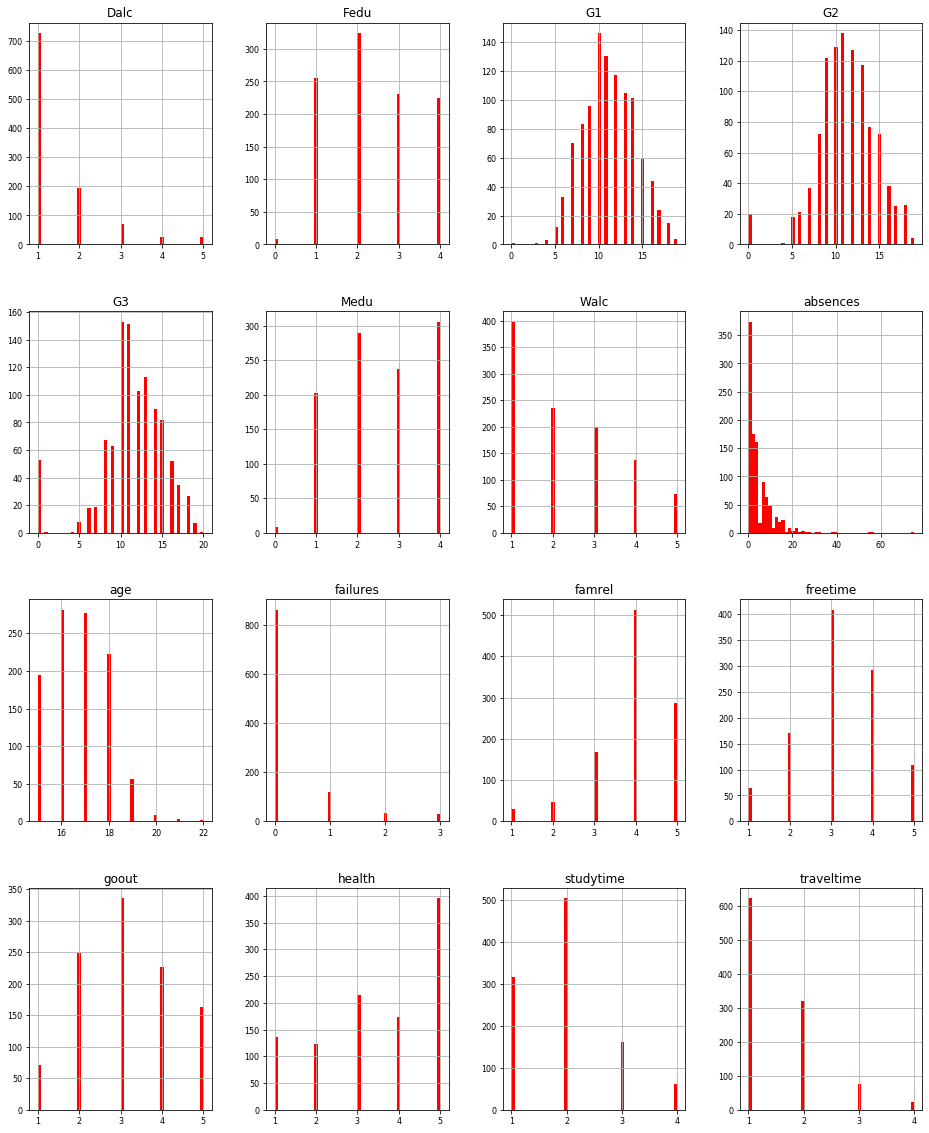

In [8]:
# Extracting all integer columns of our dataframes and showing their distributions

for s in sets:
    nums = s[0].select_dtypes(include = ['float64', 'int64'])
    print("Distributions of all integer columns of {} students".format(s[1]))
    nums.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8,color=s[2])
    plt.show()

There are 2 strongly correlated values with Walc (in math students):
Walc    1.000000
Dalc    0.647544
Name: Walc, dtype: float64

There are 2 strongly correlated values with Walc (in Portuguese students):
Walc    1.000000
Dalc    0.616561
Name: Walc, dtype: float64

There are 2 strongly correlated values with Walc (in all students):
Walc    1.000000
Dalc    0.627814
Name: Walc, dtype: float64



/Users/lennartpikijn/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


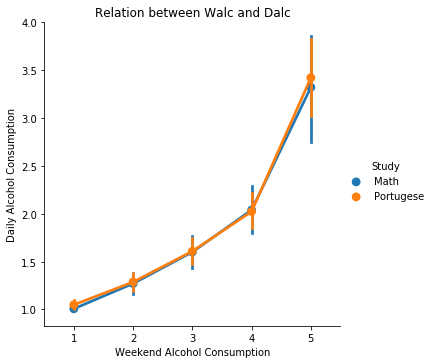

There are 2 strongly correlated values with Dalc (in math students):
Dalc    1.000000
Walc    0.647544
Name: Dalc, dtype: float64

There are 2 strongly correlated values with Dalc (in Portuguese students):
Dalc    1.000000
Walc    0.616561
Name: Dalc, dtype: float64

There are 2 strongly correlated values with Dalc (in all students):
Dalc    1.000000
Walc    0.627814
Name: Dalc, dtype: float64



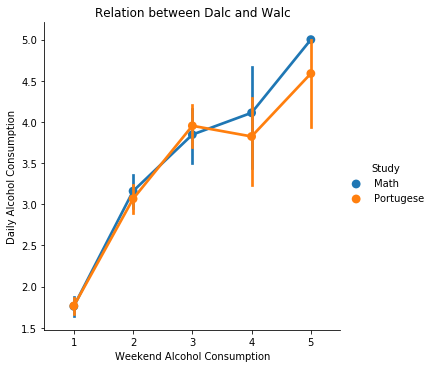

In [10]:
# Checking the correlations of the Y-labels (Walc)

atts = ['Walc', 'Dalc']

for att in atts:
    for s in sets:
        corr = s[0].corr()[att][:-1]
        corrlist = corr[abs(corr) >0.5].sort_values(ascending=False)
        print("There are {} strongly correlated values with {} (in {} students):\n{}".format(len(corrlist),att,s[1],corrlist))
        print()
    x = atts[0]
    y = atts [1]
    if att != x:
        x = atts[1]
        y = atts[0]
    relationplot = sns.factorplot(x=x, y=y, hue="Study", data=studentmerge)
    relationplot.set(ylabel="Daily Alcohol Consumption", xlabel="Weekend Alcohol Consumption")
    plt.title("Relation between {} and {}".format(x, y))
    plt.show()


Integer column relationships in student-math


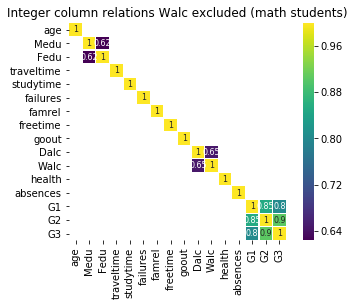

Integer column relationships in student-Portuguese


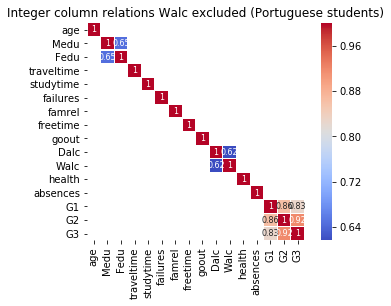

Integer column relationships in student-all


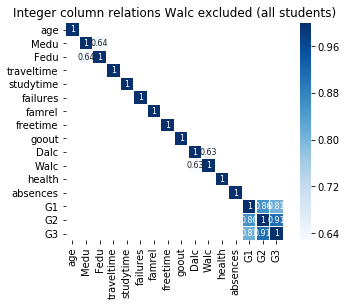

In [11]:
# Integer column relationships 

i = 0

for s in sets:
    cmaps = ['viridis', 'coolwarm', 'Blues']
    print("Integer column relationships in student-{}".format(s[1]))
    nums = s[0].select_dtypes(include = ['float64', 'int64'])
    corr = nums.corr()
    sns.heatmap(corr[(corr>=0.5) | (corr <= -0.4)],cmap=cmaps[i],vmax=1.0,linewidths=0.1,annot=True,annot_kws={"size": 8},square=True)
    plt.title("Integer column relations Walc excluded ({} students)".format(s[1]))
    i += 1
    plt.show()
    


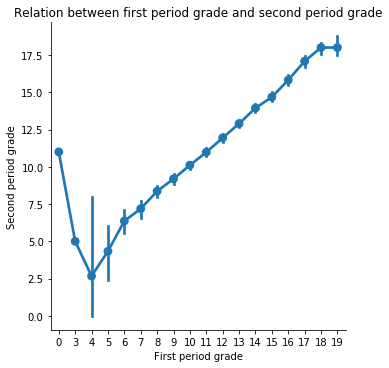

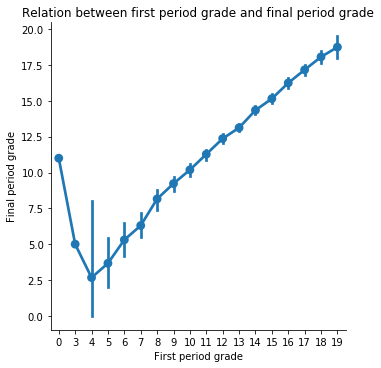

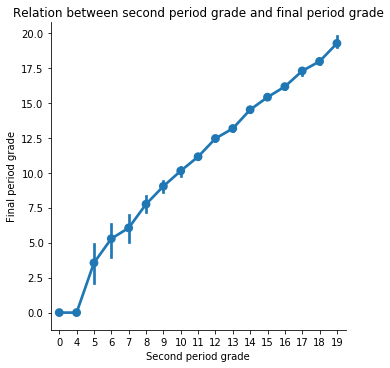

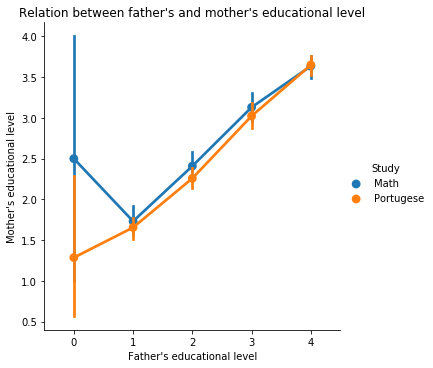

In [12]:
# We discovered integer columns with correlations in the block above, 
# therefore we will further investigate these relations here

relationplot = sns.factorplot(x="G1", y="G2", data=studentmerge)
relationplot.set(ylabel="Second period grade", xlabel="First period grade")
plt.title("Relation between first period grade and second period grade")
plt.show()

relationplot = sns.factorplot(x="G1", y="G3", data=studentmerge)
relationplot.set(ylabel="Final period grade", xlabel="First period grade")
plt.title("Relation between first period grade and final period grade")
plt.show()

relationplot = sns.factorplot(x="G2", y="G3", data=studentmerge)
relationplot.set(ylabel="Final period grade", xlabel="Second period grade")
plt.title("Relation between second period grade and final period grade")
plt.show()

#Why doesnt hue work for these first 3 ??!

relationplot = sns.factorplot(x="Fedu", y="Medu",hue="Study", data=studentmerge)
relationplot.set(ylabel="Mother's educational level", xlabel="Father's educational level")
plt.title("Relation between father's and mother's educational level")
plt.show()

In [17]:
studentmerge_encoded = pd.get_dummies(studentmerge)

y = studentmerge_encoded["Walc"]
X = studentmerge_encoded.drop(["Walc"],axis=1)

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
                               
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']  

# Print 10 best features
print(featureScores.nlargest(10,'Score'))  

       Attributes       Score
9            Dalc  266.345132
11       absences  188.094221
8           goout   72.189929
18          sex_M   62.955009
17          sex_F   48.254855
5        failures   29.080184
43  schoolsup_yes   24.903607
4       studytime   21.792479
12             G1   20.418031
14             G3   19.706887


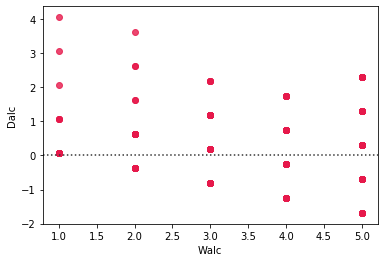

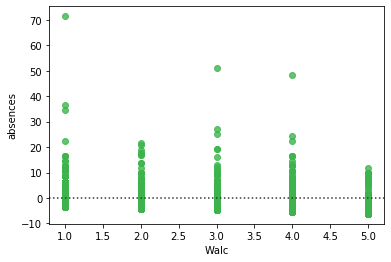

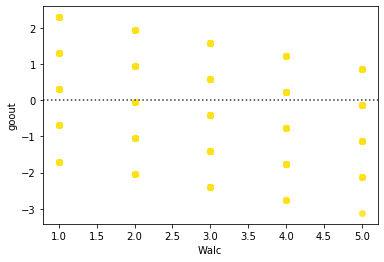

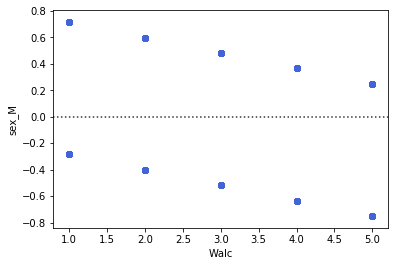

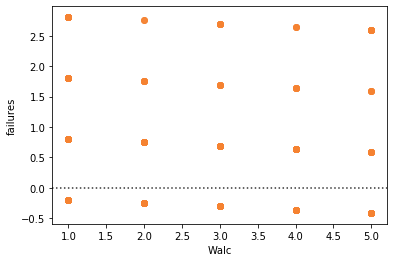

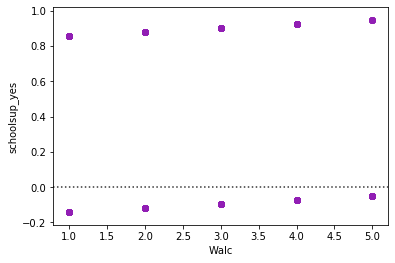

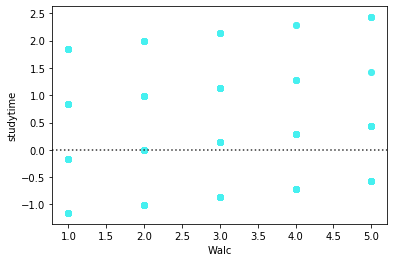

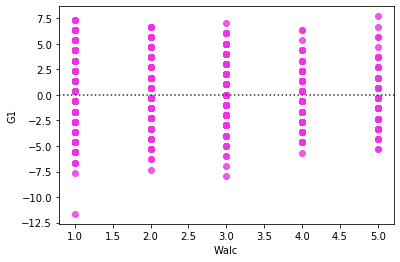

In [13]:
# Residual plots   

data = pd.read_csv("Data/student-merge.csv")
data = pd.get_dummies(data, drop_first=True)
y = data["Walc"]
X = data.drop(["Walc"],axis=1)
best_features = ['Dalc', 'absences', 'goout','sex_M','failures','schoolsup_yes','studytime','G1']  
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']
i = 0
for b in best_features:
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    sns.residplot(x=data.Walc, y=X[b], color=colors[i])
    i += 1

In [ ]:
# This was made due to a wrong interpretation of the correlation matrix, 
# although the visualisations were quite interesting so we thought it would be 
# a waste to delete since they were already created!

# relationplot = sns.factorplot(x="Walc", y="G1", hue="Study", data=studentmerge)
# relationplot.set(ylabel="First period grade", xlabel="Weekend Alcohol Consumption")
# plt.title("Relation between first period grade and Weekend Alcohol Consumption")
# plt.show()

# relationplot = sns.factorplot(x="Walc", y="G2", hue="Study", data=studentmerge)
# relationplot.set(ylabel="Second period grade", xlabel="Weekend Alcohol Consumption")
# plt.title("Relation between second period grade and Weekend Alcohol Consumption")
# plt.show()

# relationplot = sns.factorplot(x="Walc", y="G3", hue="Study", data=studentmerge)
# relationplot.set(ylabel="Final grade", xlabel="Weekend Alcohol Consumption")
# plt.title("Relation between final grade and Weekend Alcohol Consumption")
# plt.show()

# relationplot = sns.factorplot(x="Walc", y="Fedu", hue="Study", data=studentmerge)
# relationplot.set(ylabel="Father's education", xlabel="Weekend Alcohol Consumption")
# plt.title("Relation between father's education and Weekend Alcohol Consumption")
# plt.show()

In [ ]:
# relationplot = sns.factorplot(x="Dalc", y="G1", hue="Study", data=studentmerge)
# relationplot.set(ylabel="First period grade", xlabel="Daily Alcohol Consumption")
# plt.title("Relation between first period grade and daily Alcohol Consumption")
# plt.show()

# relationplot = sns.factorplot(x="Dalc", y="G2", hue="Study", data=studentmerge)
# relationplot.set(ylabel="Second period grade", xlabel="Daily Alcohol Consumption")
# plt.title("Relation between second period grade and daily Alcohol Consumption")
# plt.show()

# relationplot = sns.factorplot(x="Dalc", y="G3", hue="Study", data=studentmerge)
# relationplot.set(ylabel="Final grade", xlabel="Daily Alcohol Consumption")
# plt.title("Relation between final grade and Weekend daily Consumption")
# plt.show()

# relationplot = sns.factorplot(x="Dalc", y="Fedu", hue="Study", data=studentmerge)
# relationplot.set(ylabel="Father's education", xlabel="Daily Alcohol Consumption")
# plt.title("Relation between father's education and daily Alcohol Consumption")
# plt.show()